# Connect to G-Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change Notebook Default Directory

In [ ]:
import os
file_dir = "/content/"
os.chdir(file_dir)

In [ ]:
!ls

drive  sample_data


# Import Libraries

In [ ]:
# Data Analysis Libraries
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=10
)

# RegEx
import regex as re

<ipython-input-7-21f15e5228a1>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

# Load Dataset

In [ ]:
csv_filename = "/content/drive/MyDrive/[Complete]Laptop_Price.csv"
df = pd.read_csv(csv_filename)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## DataFrame's Info

In [ ]:
# DataFrame shape
df.shape

(1303, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Observations:

*   Tabel terdiri atas 13 kolom dan
    1303 baris.
*   Tidak ada data dengan nilai Null
    didalamnya.
*   Pada raw data terdapat berbagai
    tipe data yang sudah sesuai dengan data yang disediakan.
    Integer (berupa bilangan bulat), Float (berupa bilangan desimal) dan Object.
*   Untuk data yang berisi angka
    dengan satuan yang belum dipisahkan seperti data RAM, Weight, Memory masih berupa type object. Kedepannya data tersebut akan di-cleaning sehingga type datanya lebih sesuai.





## Describe Dataframe

In [ ]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


<ipython-input-39-b0d8b8ec1456>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


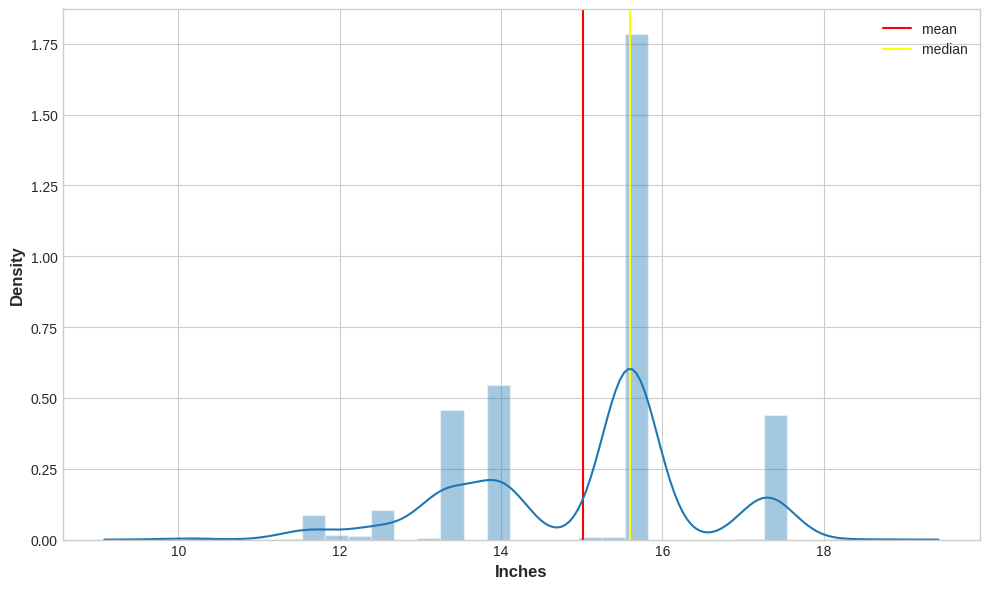

In [ ]:
plt.figure(figsize = (10, 6))
plt.axvline(df['Inches'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['Inches'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['Inches'])
plt.legend()

<ipython-input-40-73134ca490f6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


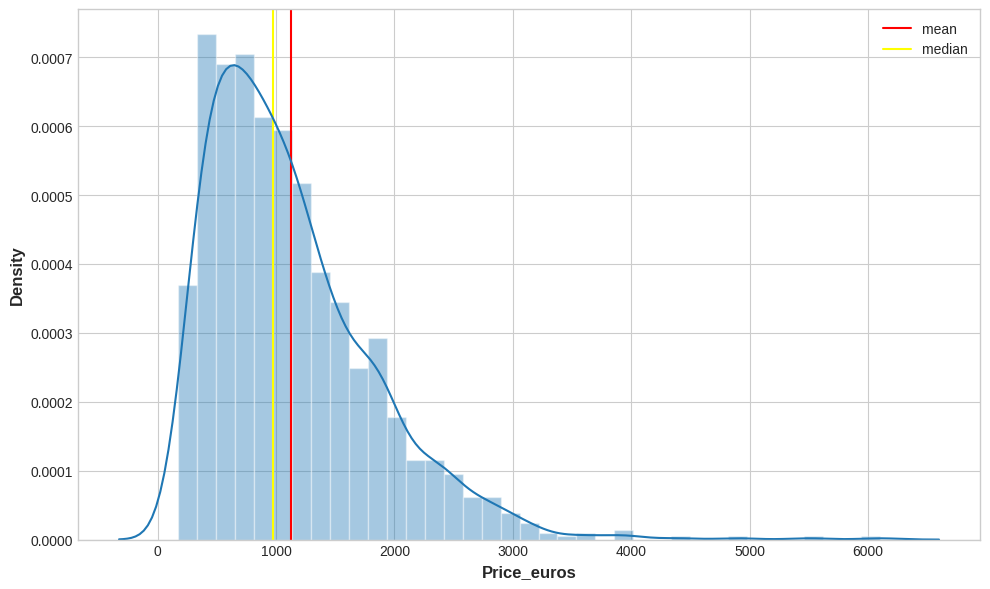

In [ ]:
plt.figure(figsize = (10, 6))
plt.axvline(df['Price_euros'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['Price_euros'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['Price_euros'])
plt.legend()

Using the '**describe**' method of the dataframe, we can get some first insights on the numerical columns.

Observations:

1. Tidak ada yang bisa di observasi
   dari kolom data laptop_ID

2. **Kolom data price_euros**
   mengindikasikan positif skewed karena nilai mean lebih kecil dari pada modus (mean>median)
   Data memiliki standar deviasi 699.1 yang termasuk cukup besar jika dibandingkan mean dan median. Hal ini menunjukkan menunjukkan variasi nilai yang besar.

3. **Kolom data Inches**
   karena masih berupa raw data kemungkinan mengindikasikan sebaran data yang normal.
   Range ukuran laptop mulai dari 10.1-18.4 inchi, dengan mean = 15.02.
   Nilai standar deviasi cukup kecil yaitu 1.43. Hal ini menunjukkan variasi data yang rwlatif homogen.
4. Nilai Kuartil (Q1, Q2, Q3)
   menunjukkan variasi sebaran data  setelah diurutkan.
   Q1 (25%) merupakan batas pencilan bawah sebuat data. Jika data  berada di bawah Q1 dapat diindikasikan ukuran tersebut merupakan pencilan bawah.
   Q2 (50%) merupakan median atau nilai tengah data yang sudah diurutkan. Nilai median ini lebih sensitif terhadap adanya pencilan dibanding nilai Mean.
   Q3 (75%) merupakan batas pencilan atas. Jika data berada di atas Q3 dapat diindikasikan ukuran tersebut merupakan pencilan atas.


# Data Cleaning

## Lowering DataFrame's Column Names

In [ ]:
# Melihat list kolom dalam bentuk array yang akan diubah menjadi lowercase
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [ ]:
# Melakukan looping tiap value dalam array
# dan mengubahnya menjadi lower case

for idx in df.columns:
  idxc = idx.lower()
  df.rename(columns={ idx : idxc }, inplace = True)
df.head()



,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Check Missing Values

In [ ]:
pd.isnull(df).sum()

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

In [ ]:
pd.isna(df).sum()

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

##### *Setelah pengecekkan nilai missing values, tidak ditemukan adanya nilai NaN atau Null pada dataset.*

## Check For Duplicates

In [ ]:
# Mengecek data duplicate menggunakan duplicated()

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

In [ ]:
# Menghitung jumlah duplikat data

dup = df.duplicated()
len(dup[dup.values == True])

0

#####*Setelah dilakukan pengecekkan duplikasi dan jumlah duplikasi, diketahui bahwa tidak ada data yang double pada dataset. Sehingga jumlah data yang duplikat = 0*

# Data Cleaning + Feature Engineering (FE)

Cek satu persatu apakah setiap kolom dapat digunakan untuk analisa selanjutnya

## Laptop ID

In [ ]:
# Tidak ada informasi yang penting dan berguna dari laptop_id.
# Maka kolom ini akan di drop.

In [ ]:
df.drop(['laptop_id'], axis=1, inplace = True)

In [ ]:
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


## Screen Resolution

######**Kolom Screen Resolution:** memiliki 3 values yang bisa dipisahkan, yaitu :
1. Screen
2. Touchscreen
3. Resolution.

##### Hal ini dapat membantu analisis lebih lanjut kedapannya.


### FE on Screen Resolution

In [ ]:
# Memecah kolom screenresolution,
# menjadi kolom screen, kolom touchscreen, dan kolom resolution

screen = []
resolution = []
touchscreen = []
for sr in df['screenresolution']:
  pecah = sr.split(' ')
  resolution.append(pecah[-1])
  satukan = ' '.join(pecah[0:(len(pecah)-1)])
  pecah2 = satukan.split('/')
  screen.append(pecah2[0])
  if(len(pecah2)>1):
    touchscreen.append(1)
  else:
    touchscreen.append(0)

df['screen']=screen
df['touchscreen']=touchscreen
df['resolution']=resolution

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen,touchscreen,resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,0,2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,,0,1440x900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,0,1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,0,2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,0,2560x1600


## CPU

In [ ]:
# Memecah kolom cpu,
# menjadi kolom processor type dan kolom processor speed

processor_type = []
processor_speed = []
for c in df['cpu']:
  pecah = c.split(' ')
  satukan = ' '.join(pecah[0:(len(pecah)-1)])
  processor_type.append(satukan)
  processor_speed.append(float(pecah[-1].replace('GHz','')))

df['processor_type']= processor_type
df['processor_speed']= processor_speed

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen,touchscreen,resolution,processor_type,processor_speed
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,0,2560x1600,Intel Core i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,,0,1440x900,Intel Core i5,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,0,1920x1080,Intel Core i5 7200U,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,0,2880x1800,Intel Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,0,2560x1600,Intel Core i5,3.1


## RAM

In [ ]:
# Mengubah string RAM menjadi float dengan menghapus satuan (GB/TB)

ram = []

for rm in df['ram']:
  ram.append(float(rm.replace('GB','')))

df['ram_gb']= ram

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen,touchscreen,resolution,processor_type,processor_speed,ram_gb
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,0,2560x1600,Intel Core i5,2.3,8.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,,0,1440x900,Intel Core i5,1.8,8.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,0,1920x1080,Intel Core i5 7200U,2.5,8.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,0,2880x1800,Intel Core i7,2.7,16.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,0,2560x1600,Intel Core i5,3.1,8.0


## Memory (Drive)

In [ ]:
# Memecah kolom memory,
# menjadi kolom memory_size dan kolom memory_type
# Mengkonversi TB --> GB

memory_size = []
memory_type = []

for mr in df['memory']:
  pecah = mr.split(' ')
  satukan = ' '.join(pecah[1:len(pecah)])
  memory_type.append(satukan)
  if 'GB' in pecah[0]:
    memory_size.append(float(pecah[0].replace('GB','')))
  elif 'TB' in pecah[0]:
    memory_size.append(float(pecah[0].replace('TB',''))*1024)

df['memory_size']= memory_size
df['memory_type']= memory_type

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,screen,touchscreen,resolution,processor_type,processor_speed,ram_gb,memory_size,memory_type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,0,2560x1600,Intel Core i5,2.3,8.0,128.0,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,,0,1440x900,Intel Core i5,1.8,8.0,128.0,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,0,1920x1080,Intel Core i5 7200U,2.5,8.0,256.0,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,0,2880x1800,Intel Core i7,2.7,16.0,512.0,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,0,2560x1600,Intel Core i5,3.1,8.0,256.0,SSD


## Weight

In [ ]:
# Menghilangkan satuan dari kolom weight(kg)

weight = []

for wg in df['weight']:
  weight.append(float(wg.replace('kg','')))

df['weight_kg']= weight

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,price_euros,screen,touchscreen,resolution,processor_type,processor_speed,ram_gb,memory_size,memory_type,weight_kg
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,1339.69,IPS Panel Retina Display,0,2560x1600,Intel Core i5,2.3,8.0,128.0,SSD,1.37
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,898.94,,0,1440x900,Intel Core i5,1.8,8.0,128.0,Flash Storage,1.34
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,...,575.00,Full HD,0,1920x1080,Intel Core i5 7200U,2.5,8.0,256.0,SSD,1.86
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,...,2537.45,IPS Panel Retina Display,0,2880x1800,Intel Core i7,2.7,16.0,512.0,SSD,1.83
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,1803.60,IPS Panel Retina Display,0,2560x1600,Intel Core i5,3.1,8.0,256.0,SSD,1.37


## CPU & GPU Manifacturing Companies

##  CPU Manufacturing Companies

In [ ]:
from matplotlib.gridspec import GridSpecFromSubplotSpec
# Memecah kolom memory,
# menjadi kolom memory_size dan kolom memory_type
# Mengkonversi TB --> GB

cpu_manufacture = []
gpu_manufacture = []

for i in range(0,len(df)):
  dfi = df.loc[i]
  cpuc = dfi['cpu'].split(' ')[0]
  gpuc = dfi['gpu'].split(' ')[0]
  cpu_manufacture.append(cpuc)
  gpu_manufacture.append(gpuc)

df['cpu_manufacture']= cpu_manufacture
df['gpu_manufacture']= gpu_manufacture

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,touchscreen,resolution,processor_type,processor_speed,ram_gb,memory_size,memory_type,weight_kg,cpu_manufacture,gpu_manufacture
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,0,2560x1600,Intel Core i5,2.3,8.0,128.0,SSD,1.37,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,1440x900,Intel Core i5,1.8,8.0,128.0,Flash Storage,1.34,Intel,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,...,0,1920x1080,Intel Core i5 7200U,2.5,8.0,256.0,SSD,1.86,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,...,0,2880x1800,Intel Core i7,2.7,16.0,512.0,SSD,1.83,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,0,2560x1600,Intel Core i5,3.1,8.0,256.0,SSD,1.37,Intel,Intel


In [ ]:
# Melakukan drop kolom yang sudah dipisah-pisah

df.drop(['screenresolution', 'cpu', 'ram', 'memory'], axis=1).head()


,company,product,typename,inches,gpu,opsys,weight,price_euros,screen,touchscreen,resolution,processor_type,processor_speed,ram_gb,memory_size,memory_type,weight_kg,cpu_manufacture,gpu_manufacture
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,0,2560x1600,Intel Core i5,2.3,8.0,128.0,SSD,1.37,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel HD Graphics 6000,macOS,1.34kg,898.94,,0,1440x900,Intel Core i5,1.8,8.0,128.0,Flash Storage,1.34,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,0,1920x1080,Intel Core i5 7200U,2.5,8.0,256.0,SSD,1.86,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,0,2880x1800,Intel Core i7,2.7,16.0,512.0,SSD,1.83,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,0,2560x1600,Intel Core i5,3.1,8.0,256.0,SSD,1.37,Intel,Intel


Now the dataset looks clean and ready to be explored

In [ ]:
df.to_csv('[Cleaned]Laptop_Price.csv', index=False)

# Exploratory Data Analysis (EDA)

## Load Cleaned Dataset

In [ ]:
csv_filename = "/content/[Cleaned]Laptop_Price.csv"
df = pd.read_csv(csv_filename)

df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,touchscreen,resolution,processor_type,processor_speed,ram_gb,memory_size,memory_type,weight_kg,cpu_manufacture,gpu_manufacture
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,0,2560x1600,Intel Core i5,2.3,8.0,128.0,SSD,1.37,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,1440x900,Intel Core i5,1.8,8.0,128.0,Flash Storage,1.34,Intel,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,...,0,1920x1080,Intel Core i5 7200U,2.5,8.0,256.0,SSD,1.86,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,...,0,2880x1800,Intel Core i7,2.7,16.0,512.0,SSD,1.83,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,0,2560x1600,Intel Core i5,3.1,8.0,256.0,SSD,1.37,Intel,Intel


## Custom functions to improve plot readability

In [ ]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

## Which brand is the most frequent in the dataframe?

In [ ]:
df.groupby('company')['company'].count().sort_values(ascending=False)

company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Fujitsu        3
Chuwi          3
LG             3
Huawei         2
Name: company, dtype: int64

##### *Dari hasil analisis menunjukkan bahwa Dell dan Lenovo merupakan brand produk yang paling banyak di dataframe, sebesar 297. Diikuti brand produk selanjutnya yaitu HP sebesar 274.*

## What type of laptop is the most frequent?

In [ ]:
df.groupby('typename')['typename'].count().sort_values(ascending=False)

typename
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: typename, dtype: int64

##### *Dari hasil analisis menunjukkan bahwa type laptop yang paling umum dalam dataframe adalah type laptop Notebook 727.*

## Which size is the most popular?

In [ ]:
df.groupby('inches')['inches'].count().sort_values(ascending=False)

inches
15.6    665
14.0    197
17.3    164
13.3    164
12.5     39
11.6     33
13.9      6
12.0      6
13.5      6
12.3      5
15.0      4
15.4      4
10.1      4
13.0      2
14.1      1
11.3      1
17.0      1
18.4      1
Name: inches, dtype: int64

##### *Dari hasil analisis menunjukkan bahwa ukuran laptop yang paling populer dalam dataframe adalah laptop dengan ukuran 15.6 inchi sebanyak 665.*

## How is weight distributed among the laptops?

In [ ]:
df.groupby('weight_kg')['weight_kg'].count().sort_values(ascending=False)

weight_kg
2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
2.75      1
2.79      1
2.83      1
1.14      1
4.70      1
Name: weight_kg, Length: 171, dtype: int64

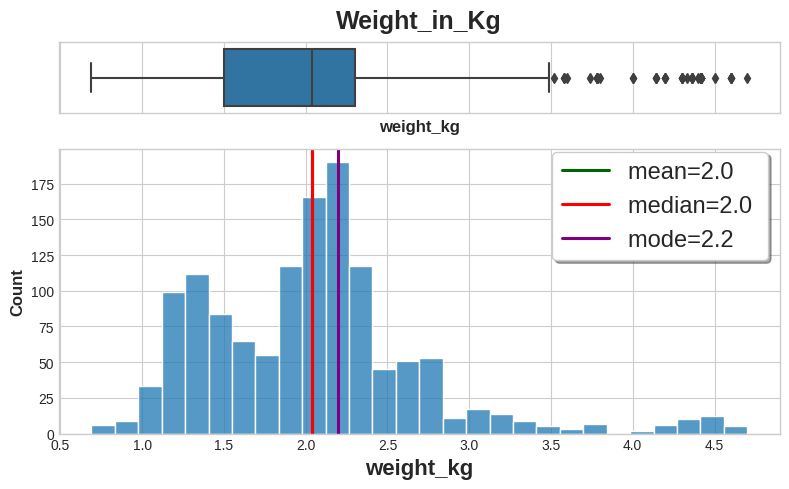

In [ ]:
num_plot(df,'weight_kg', 'Weight_in_Kg', ' ')

##### *Dari hasil analisis mengindikasikan bahwa berat laptop terdistibusi normal. Nilai mean=median yaitu sebesar 2.0, sedangkan nilai modus sebesar 2.2.*

## How is price distributed among the laptops?

In [ ]:
df.groupby('price_euros')['price_euros'].count().sort_values(ascending=False)

price_euros
1099.00    14
1499.00    14
1799.00    14
1199.00    11
499.00     11
           ..
849.90      1
850.66      1
854.00      1
855.00      1
6099.00     1
Name: price_euros, Length: 791, dtype: int64

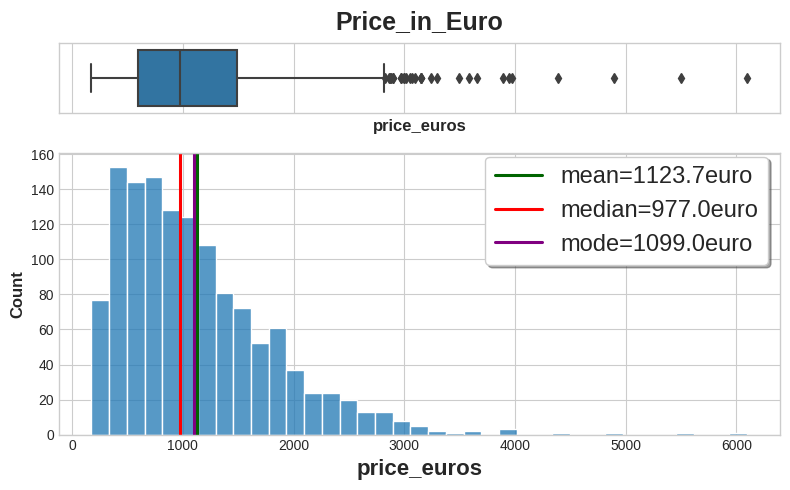

In [ ]:
num_plot(df,'price_euros', 'Price_in_Euro', 'euro')

In [ ]:
# Menghitung Nilai skewness dengan Pandas
df.skew()["price_euros"]

<ipython-input-74-a3871e57a51f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()["price_euros"]


1.5208655681688525

##### *Dari hasil analisis: mengindikaiskan bahwa data price menunjukkan positif skewed.Nilai mean > nilai median.*

## How is RAM distributed among the laptops?

In [ ]:
df.groupby('ram_gb')['ram_gb'].count().sort_values(ascending=False)

ram_gb
8.0     619
4.0     375
16.0    200
6.0      41
12.0     25
2.0      22
32.0     17
24.0      3
64.0      1
Name: ram_gb, dtype: int64

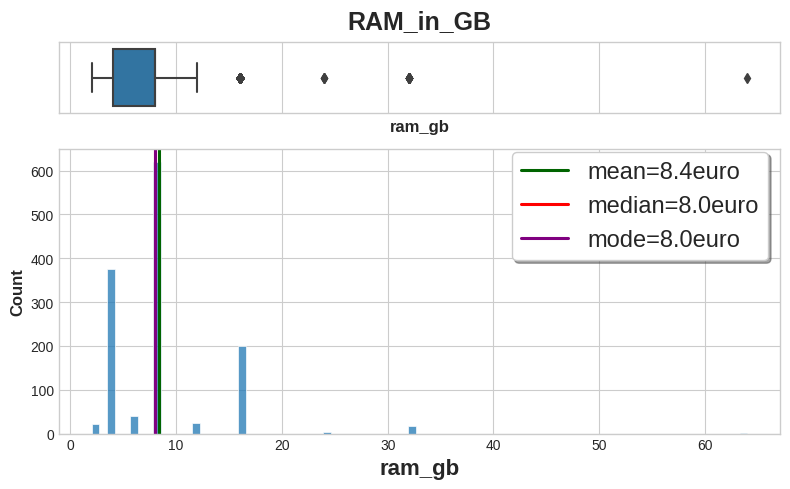

In [ ]:
num_plot(df,'ram_gb', 'RAM_in_GB', 'euro')

In [ ]:
df.skew()["ram_gb"]

<ipython-input-75-a2cba734e588>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()["ram_gb"]


2.6868062634940526

##### *Dari hasil analisis: mengindikaiskan bahwa data ram menunjukkan positif skewed.Nilai mean > nilai median.*

## How is CPU frequency distributed among the laptops?

In [ ]:
df.groupby('processor_speed')['processor_speed'].count().sort_values(ascending=False)

processor_speed
2.50    293
2.70    166
2.80    165
1.60    134
2.00     86
2.30     86
1.80     78
2.60     76
1.10     53
2.40     52
2.90     21
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
0.90      4
3.10      3
2.10      3
1.90      2
1.00      1
1.92      1
3.20      1
Name: processor_speed, dtype: int64

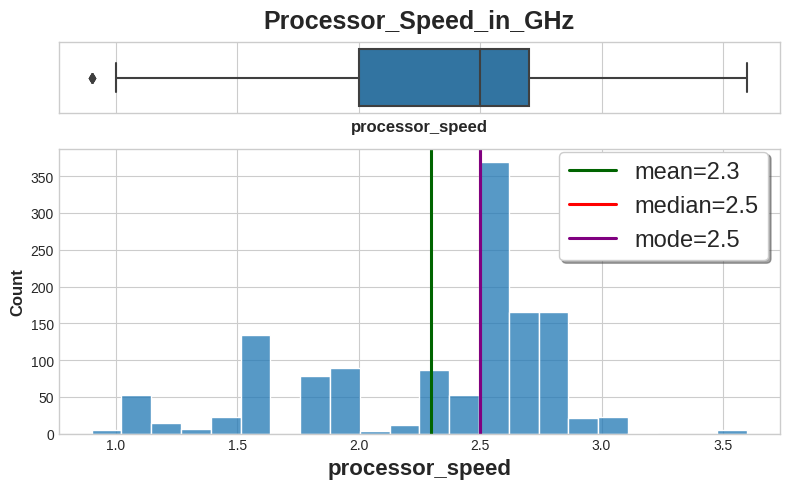

In [ ]:
num_plot(df,'processor_speed', 'Processor_Speed_in_GHz', '')

In [ ]:
df.skew()["processor_speed"]

<ipython-input-76-b68b107e9a8b>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()["processor_speed"]


-0.832520289269616

##### *Dari hasil analisis: mengindikaiskan bahwa data memory_speed menunjukkan negatif skewed.Nilai mean < nilai median.*

## How is Hard Drive capacity distributed among the laptops?

In [ ]:
df.groupby('memory_size')['memory_size'].count().sort_values(ascending=False)

memory_size
256.0     508
1024.0    250
128.0     177
512.0     140
500.0     132
32.0       45
64.0       17
2048.0     16
16.0       10
180.0       5
8.0         1
240.0       1
508.0       1
Name: memory_size, dtype: int64

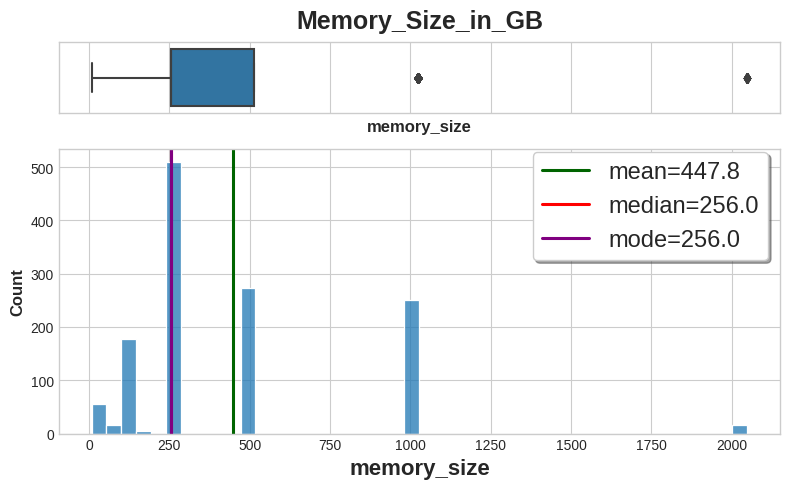

In [ ]:
num_plot(df,'memory_size', 'Memory_Size_in_GB', '')

In [ ]:
df.skew()["memory_size"]

<ipython-input-77-c82d16698a7b>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()["memory_size"]


1.5508008720761157

##### *Dari hasil analisis: mengindikaiskan bahwa data memory_size menunjukkan positif skewed.Nilai mean > nilai median.*

## Price VS CPU brand by GPU brand

In [ ]:
import random
colorlist =['#B12F3F', '#B1CF7B', '#9fc5e8', '#ea9999', '#ffd966']
gpulist = df['gpu_manufacture'].unique()
warna = {}
for i in range(0,len(gpulist)):
  warna[gpulist[i]]=colorlist[i]
print(warna)

{'Intel': '#B12F3F', 'AMD': '#B1CF7B', 'Nvidia': '#9fc5e8', 'ARM': '#ea9999'}


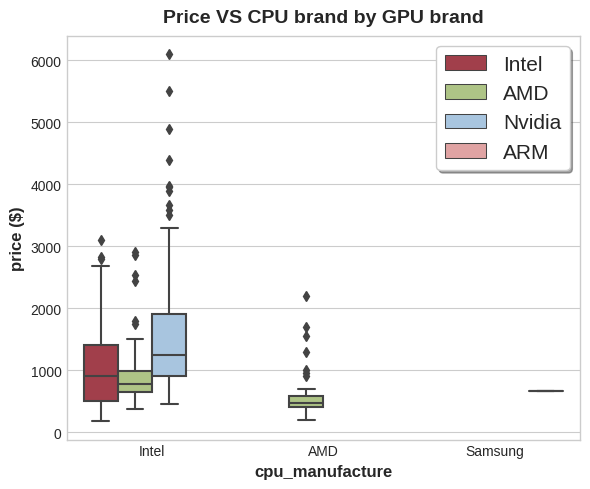

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x='cpu_manufacture', y='price_euros', data=df, hue='gpu_manufacture', palette=warna)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc='upper right', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

## Which are the TOP 15 most common GPUs?

In [ ]:
# Berikut merupakan top 15 most common GPU

df.groupby('gpu')['gpu'].count().sort_values(ascending=False).head(15)

gpu
Intel HD Graphics 620         281
Intel HD Graphics 520         185
Intel UHD Graphics 620         68
Nvidia GeForce GTX 1050        66
Nvidia GeForce GTX 1060        48
Nvidia GeForce 940MX           43
AMD Radeon 530                 41
Intel HD Graphics 500          39
Intel HD Graphics 400          37
Nvidia GeForce GTX 1070        30
Intel HD Graphics              29
Nvidia GeForce GTX 1050 Ti     28
AMD Radeon R5 M430             22
Nvidia GeForce 930MX           20
AMD Radeon 520                 17
Name: gpu, dtype: int64

## Which are the TOP 15 most common CPUs?

In [ ]:
# Berikut merupakan top 15 most common CPU

df.groupby('processor_type')['processor_type'].count().sort_values(ascending=False).head(15)

processor_type
Intel Core i5 7200U              193
Intel Core i7 7700HQ             147
Intel Core i7 7500U              135
Intel Core i3 6006U               81
Intel Core i7 8550U               73
Intel Core i5 8250U               72
Intel Core i5 6200U               68
Intel Core i7 6500U               51
Intel Core i7 6700HQ              43
Intel Core i3 7100U               37
Intel Core i5 7300HQ              33
Intel Celeron Dual Core N3350     33
Intel Celeron Dual Core N3060     29
Intel Core i7 6600U               18
Intel Pentium Quad Core N4200     14
Name: processor_type, dtype: int64

## What is the average price of laptops by company?

In [ ]:
# Berikut merupakan rata-rata harga laptop berdasarkan company

df['price_euros'].mean()

1123.6869915579432

Insights:
* Laptop lenovo dan dell merupakan
  brand laptop yang paling banyak produknya.
* Laptop type notebook paling populer
* Kebanyakan produk laptop memiliki  
  ukuran 15.6 inchi merupakan laptop yang paing banyak digunakan.
* Ram berkapasitas 8 GB paling  
  banyak digunakan oleh produ-produk laptop.
* Processor Intel Core i5 7200U
  merupakan tipe yang paling bnayak digunakan di produk laptop